In [2]:
%reload_ext autoreload
%autoreload 2

import sys, os
#os.chdir("./simple_hwr")
#sys.path.append("./simple_hwr")
print(os.getcwd())


/media/data/GitHub/simple_hwr


In [3]:
# %reset -f

import crnn
from pathlib import Path
import train
import hwr_utils
import torch
import numpy as np



Threads: 6


In [17]:
torch.set_num_threads(6)
torch.cuda.empty_cache()
#config = "/media/data/GitHub/simple_hwr/results/BEST/20190807_104745-smallv2/RESUME.yaml"
config = "/media/data/GitHub/simple_hwr/config/TESTING.yaml"
config, train_dataloader, test_dataloader, train_dataset, test_dataset, validation_dataset, validation_dataloader = train.build_model(config)

print(config["idx_to_char"])
print(config["char_to_idx"])

[<GPUtil.GPUtil.GPU object at 0x7f4db3d137b8>, <GPUtil.GPUtil.GPU object at 0x7f4daf70a710>]
/media/data/GitHub/simple_hwr/configs/TESTING.yaml
Experiment: occlusion, Results Directory: ./results/occlusion
| ID | GPU  | MEM |
-------------------
|  0 |   1% | 18% |
|  1 | nan% | 43% |
1.0
Effective logging level: 20
Using config file /media/data/GitHub/simple_hwr/configs/TESTING.yaml
Using GPU
13:21:27 INFO Loading data...
13:21:27 INFO Loading data...
13:21:27 INFO Loading data...
13:21:27 INFO Loading data...


/media/data/GitHub/simple_hwr/hwr_utils.py:50: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return fix_scientific_notation(yaml.load(stream))


Number of training instances: 10830
Number of test instances: 1861 

13:21:27 INFO Building model...
13:21:27 INFO Building model...
13:21:27 INFO Building model...
13:21:27 INFO Building model...
Intermediate pass None
Creating LSTM: in:1024 hidden:512 dropout:0.5 layers:2 out:80
13:21:27 INFO Sending model to cuda...
13:21:27 INFO Sending model to cuda...
13:21:27 INFO Sending model to cuda...
13:21:27 INFO Sending model to cuda...
13:21:27 INFO Creating trainer...
13:21:27 INFO Creating trainer...
13:21:27 INFO Creating trainer...
13:21:27 INFO Creating trainer...
{1: ' ', 2: '!', 3: '"', 4: '#', 5: '%', 6: '&', 7: "'", 8: '(', 9: ')', 10: '+', 11: ',', 12: '-', 13: '.', 14: '/', 15: '0', 16: '1', 17: '2', 18: '3', 19: '4', 20: '5', 21: '6', 22: '7', 23: '8', 24: '9', 25: ':', 26: ';', 27: '?', 28: 'A', 29: 'B', 30: 'C', 31: 'D', 32: 'E', 33: 'F', 34: 'G', 35: 'H', 36: 'I', 37: 'J', 38: 'K', 39: 'L', 40: 'M', 41: 'N', 42: 'O', 43: 'P', 44: 'Q', 45: 'R', 46: 'S', 47: 'T', 48: 'U', 49

In [7]:
# config["exclude_offline"] =  False
# config["online_augmentation"] =  False

# config = hwr_utils.make_config_consistent(config)
# train_dataloader, test_dataloader, train_dataset, test_dataset = train.load_data(config)
# print(config['n_train_instances'])


In [18]:
print(config["validation_jsons"])
print("validation_jsons" in config)

for i in validation_dataloader:
    print(i["gt"][0])
    break
for i in test_dataloader:
    print(i["gt"][0])
    break
    

['prepare_IAM_Lines/gts/lines/txt/val1.json', 'prepare_IAM_Lines/gts/lines/txt/val2.json']
True
They also had to cope with the usual flood of rumours , so-
He rose from his breakfast-nook bench


In [ ]:
config['n_train_instances']
config["training_jsons"]
config["image_dir"]

In [ ]:
for i, x in enumerate(train_dataloader):
    print(i, x)
    stpo


Threads: 1
09:48:18 INFO 0.1549664423959239 1.641289234161377
09:48:20 INFO 0.14218122414195564 1.4683438539505005
09:48:21 INFO 0.14006068842766992 1.3257769346237183
09:48:22 INFO 0.12869172633133713 1.2407599687576294
09:48:24 INFO 0.1156011190961849 1.3237155675888062
09:48:25 INFO 0.11366272735516156 1.2512495517730713
09:48:26 INFO 0.11130346019326282 1.180554747581482
09:48:27 INFO 0.1083121876707403 1.1175587177276611
09:48:29 INFO 0.12483158278815137 1.0463184118270874
09:48:30 INFO 0.1067405572781791 0.9209408760070801
09:48:31 INFO 0.09389059021625551 0.7561201453208923
09:48:32 INFO 0.09376707242969425 0.6973289847373962
09:48:34 INFO 0.08153943192814858 0.6260721683502197
09:48:35 INFO 0.06973280138119295 0.5505985021591187
09:48:36 INFO 0.06973280138119295 0.49411144852638245
09:48:37 INFO 0.0607393936732822 0.45038050413131714
09:48:39 INFO 0.20606834822419248 1.4639934301376343
09:48:40 INFO 0.18597339062720653 1.2608492374420166
09:48:41 INFO 0.16675621806399737 1.0866

KeyboardInterrupt: 

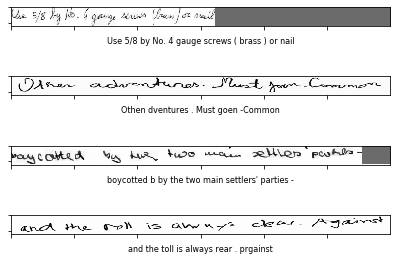

In [20]:
dataloader = train_dataloader # test_dataloader
train.improver(config["model"], dataloader, config["criterion"], config["optimizer"], config["dtype"], config, mask_online_as_offline=False, iterations=20)


In [ ]:
torch.cuda.empty_cache()


ModuleNotFoundError: No module named 'sklearn'